# Time Series Classification
## logistic regression

# 1.

## (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [1]:
import pandas as pd
import glob
import numpy as np
import os
# import warnings

# warnings.filterwarnings("ignore")

train_set_path = []
test_set_path = []
total_set_path = []
bending_train_set_path = []
bending_test_set_path = []
notbending_test_set_path = []
notbending_train_set_path = []



path = '/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'
Root = os.listdir(path)

for folder_name in Root[1:]:
    #print (foldName)
    temp = os.path.join('%s%s' %(path, folder_name))
    #print(temp)
    feature_path = os.listdir(temp+'/')
    if (folder_name == 'bending1' or folder_name == 'bending2'):
        for i in range(0,2):
            test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            total_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            bending_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(2,len(feature_path)):
            train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            total_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            bending_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
    elif(folder_name == 'cycling' or folder_name == 'lying' or folder_name == 'sitting' or folder_name == 'standing' or folder_name == 'walking' ):
        for i in range(0,3):
            test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            total_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            notbending_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(feature_path)):
            train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            total_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
            notbending_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
   # featurel = len(feature_path)

#print(train_set_path)
#print(test_set_path)
# print(total_set_path)
#print(bending_train_set_path)
#print(notbending_train_set_path)
#print(bending_test_set_path)
#print(notbending_test_set_path)

#train_set_list has 69 dataframe
train_set_list = [] 
for i in train_set_path:
    #print(i)
    temp_df = pd.read_csv(i, skiprows=5, names = ['Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
    if i in bending_train_set_path:
        temp_df['class']=1
    else:
        temp_df['class']=0
    #print(temp_df)
    train_set_list.append(temp_df)
    
#print(train_set_list)
#print(len(train_set_list))

#test_set_list has 19 dataframe
test_set_list = []
for i in test_set_path:
    temp_df = pd.read_csv(i, skiprows=5, names = ['Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
    if i in bending_test_set_path:
        temp_df['class']=1
    else:
        temp_df['class']=0
    #print(temp_df)
    test_set_list.append(temp_df)

#print(test_set_list)
#print(len(test_set_list))
    


## (c) Feature Extraction Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

## i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

### Answer: minimum, maximum, mean, median, standard deviation, first quartile, and third quartile

## ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [2]:
from pandas.core.frame import DataFrame

list_name = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
# for i = train_set_list[0]:
#     #print(i)

train_set = []
for i in train_set_list:
    #print(i)
    every_col_list = []
    for j in list_name:
        #print(i[j])
        
        temp_min = min(i[j])
        every_col_list.append(temp_min)
        
        temp_max = max(i[j])
        every_col_list.append(temp_max)
        
        temp_mean = i[j].mean()
        every_col_list.append(temp_mean)
        
        temp_median = np.median(i[j])
        every_col_list.append(temp_median)
        
        temp_std = np.std(i[j])
        every_col_list.append(temp_std)
        
        temp_1q = np.percentile(i[j], 25)
        every_col_list.append(temp_1q)
        
        temp_3q = np.percentile(i[j], 75)
        every_col_list.append(temp_3q)
    #print(every_col_list)
    #print(len(every_col_list))
    #print(i['class'].mean())
    every_col_list.append(i['class'].mean())
    #print(every_col_list)
    #print(len(every_col_list))
    #print()
    train_set.append(every_col_list)
#print(train_set)

train_dataset = pd.DataFrame(train_set, columns=['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6',
                                     'class'
                                     ])
print(train_dataset)
        
        

     min1   max1      mean1  median1  standard deviation1  first quartile1  \
0   35.00  47.40  43.954500   44.330             1.557210          43.0000   
1   33.00  47.75  42.179813   43.500             3.666840          39.1500   
2   33.00  45.75  41.678063   41.750             2.241152          41.3300   
3   37.00  48.00  43.454958   43.250             1.384653          42.5000   
4   36.25  48.00  43.969125   44.500             1.616677          43.3100   
5   18.00  46.00  35.193333   36.000             4.746916          32.0000   
6   20.75  46.25  34.763333   35.290             4.737266          31.6700   
7   21.50  51.00  34.935813   35.500             4.641102          32.0000   
8   18.33  47.67  34.333042   34.750             4.943612          31.2500   
9   18.33  45.75  34.599875   35.125             4.726858          31.5000   
10  15.50  43.67  34.225875   34.750             4.437168          31.2500   
11  21.50  51.25  34.253521   35.000             4.935592       

In [3]:
test_set = []
for i in test_set_list:
    #print(i)
    every_col_list = []
    for j in list_name:
        
        temp_min = min(i[j])
        every_col_list.append(temp_min)
        
        temp_max = max(i[j])
        every_col_list.append(temp_max)
        
        temp_mean = i[j].mean()
        every_col_list.append(temp_mean)
        
        temp_median = np.median(i[j])
        every_col_list.append(temp_median)
        
        temp_std = np.std(i[j])
        every_col_list.append(temp_std)
        
        temp_1q = np.percentile(i[j], 25)
        every_col_list.append(temp_1q)
        
        temp_3q = np.percentile(i[j], 75)
        every_col_list.append(temp_3q)
    
    #print(every_col_list)
    #print(len(every_col_list))
    #print(i['class'].mean())
    every_col_list.append(i['class'].mean())
    #print(every_col_list)
    #print(len(every_col_list))
    #print()
    test_set.append(every_col_list)
#print(train_set)

test_dataset = pd.DataFrame(test_set, columns=['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6',
                                     'class'
                                     ])
print(test_dataset)
        
        

     min1   max1      mean1  median1  standard deviation1  first quartile1  \
0   37.25  45.00  40.624792   40.500             1.475428          39.2500   
1   38.00  45.67  42.812812   42.500             1.434054          42.0000   
2   19.33  43.50  34.227771   35.500             4.884480          30.5000   
3   12.50  45.00  33.509729   34.125             4.845868          30.5000   
4   15.00  46.75  34.660583   35.000             5.309571          31.0000   
5   12.75  51.00  24.562958   24.250             3.733619          23.1875   
6    0.00  42.75  27.464604   28.000             3.579847          25.5000   
7   33.33  48.00  44.334729   45.000             2.474358          42.2500   
8   35.50  46.25  43.174938   43.670             1.986979          42.5000   
9   32.75  47.00  42.760563   44.500             3.395376          41.3300   
10  33.25  48.00  42.363563   43.000             2.066091          42.0000   
11  37.00  50.75  45.917667   45.635             1.087892       

In [4]:
dataset_list = [test_dataset, train_dataset]
all_dataset = pd.concat(dataset_list, ignore_index=True)

# print(all_dataset)

In [5]:
###normalized data  !! the last column should not be normalized
from sklearn import preprocessing

#temp_test is dataframe
temp_test=test_dataset[['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6']]

#normalized_test_dataset is numpy.ndarray, change it to dataframe
scaler1=preprocessing.MinMaxScaler()
scaler1.fit(temp_test)
normalized_test_dataset = pd.DataFrame(scaler1.transform(temp_test))
normalized_test_dataset['class']= test_dataset['class']
normalized_test_dataset.columns=['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6',
                                     'class']
#print(normalized_test_dataset) 




temp_train= train_dataset[['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6']]

# print(train_dataset)

scaler2=preprocessing.MinMaxScaler()
scaler2.fit(temp_train)
# n = scaler2.transform(temp_train)
# print(n)
normalized_train_dataset = pd.DataFrame(scaler2.transform(temp_train))
normalized_train_dataset['class']= train_dataset['class']
normalized_train_dataset.columns=['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6',
                                     'class']
print(normalized_train_dataset)


temp_all=all_dataset[['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6']]

scaler3=preprocessing.MinMaxScaler()
scaler3.fit(temp_all)
normalized_all_dataset = pd.DataFrame(scaler3.transform(temp_all))
normalized_all_dataset['class']= all_dataset['class']
normalized_all_dataset.columns=['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6',
                                     'class']
print(normalized_all_dataset)



        min1      max1     mean1   median1  standard deviation1  \
0   0.729167  0.662857  0.800389  0.820976             0.199526   
1   0.687500  0.676190  0.712913  0.780488             0.475507   
2   0.687500  0.600000  0.688182  0.695122             0.288999   
3   0.770833  0.685714  0.775766  0.768293             0.176953   
4   0.755208  0.685714  0.801110  0.829268             0.207306   
5   0.375000  0.609524  0.368545  0.414634             0.616801   
6   0.432292  0.619048  0.347350  0.380000             0.615539   
7   0.447917  0.800000  0.355851  0.390244             0.602959   
8   0.381875  0.673143  0.326140  0.353659             0.642533   
9   0.381875  0.600000  0.339293  0.371951             0.614177   
10  0.322917  0.520762  0.320858  0.353659             0.576280   
11  0.447917  0.809524  0.322221  0.365854             0.641484   
12  0.406250  0.584000  0.289361  0.329268             0.603611   
13  0.411458  0.590476  0.325633  0.378049             0.61688

## iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [6]:

def Bootstrap_method(data, alpha, ):
    n = 10000
    length = len(data)
    index = np.random.randint(0,length,size=(n,length))
    
    samples = data[index]
    
    stat = np.sort(np.std(samples,1))
    #print(samples.shape)
    left_of_interval=stat[int((alpha/2)*n)]
    right_of_interval=stat[int((1-alpha/2)*n)]
    confidence_interval=(left_of_interval, right_of_interval)
    print(confidence_interval)
    return confidence_interval

col_list = ['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
                                     'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
                                     'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
                                     'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
                                     'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
                                     'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6']

for i in col_list:
    #print (i)
    #print(all_dataset[i])
    #print(type(all_dataset[i].values))
    Bootstrap_method(normalized_all_dataset[i].values,0.1)
    
    

# temp_nor=normalized_all_dataset[['min1','max1','mean1','median1','standard deviation1', 'first quartile1', 'third quartile1',
#                                      'min2','max2','mean2','median2','standard deviation2', 'first quartile2', 'third quartile2',
#                                      'min3','max3','mean3','median3','standard deviation3', 'first quartile3', 'third quartile3',
#                                      'min4','max4','mean4','median4','standard deviation4', 'first quartile4', 'third quartile4',
#                                      'min5','max5','mean5','median5','standard deviation5', 'first quartile5', 'third quartile5',
#                                      'min6','max6','mean6','median6','standard deviation6', 'first quartile6', 'third quartile6']]


# bootstrap_data(temp_nor.values,0.1)



(0.171255651258291, 0.22359232211120478)
(0.12612715288371573, 0.20077028101825056)
(0.19981101105575258, 0.24949351875396367)
(0.20084999820350402, 0.2508798037713283)
(0.20453471099904788, 0.25378093451809025)
(0.22301050932936067, 0.2661458000254611)
(0.15730289916783513, 0.21095664930964286)
(0.0, 0.0)
(0.2737044210899566, 0.31995571200679607)
(0.3051075248690988, 0.37170376268295174)
(0.288952783614761, 0.3601019145885436)
(0.3104179771755197, 0.36439015672545033)
(0.2864377342882883, 0.3586840965850593)
(0.3089953703195931, 0.37426990692910483)
(0.3227187923935318, 0.36300733479715225)
(0.17530564439442944, 0.229165945837495)
(0.19113625249124963, 0.25072200403792905)
(0.1844832530282246, 0.2438648283753011)
(0.12843435896606265, 0.18931448055892466)
(0.19961550094673094, 0.2594754346939576)
(0.191145577599458, 0.25359030013806777)
(0.0, 0.0)
(0.22014545313021397, 0.26327427661189035)
(0.35200864879894067, 0.4005923451919938)
(0.327935118757445, 0.37347378923963503)
(0.2885253010

## iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

## answer: min mean and max

## (d) Binary Classification Using Logistic Regression

## i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

train_datasetd1= normalized_train_dataset[['min1','max1','mean1','min2','max2','mean2','min6','max6','mean6','class']]
#print(train_datasetd1)

sns.pairplot(train_datasetd1, hue='class', kind='scatter')
plt.show()


## ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i?
### Answer: I do not see any considerable difference in the results.

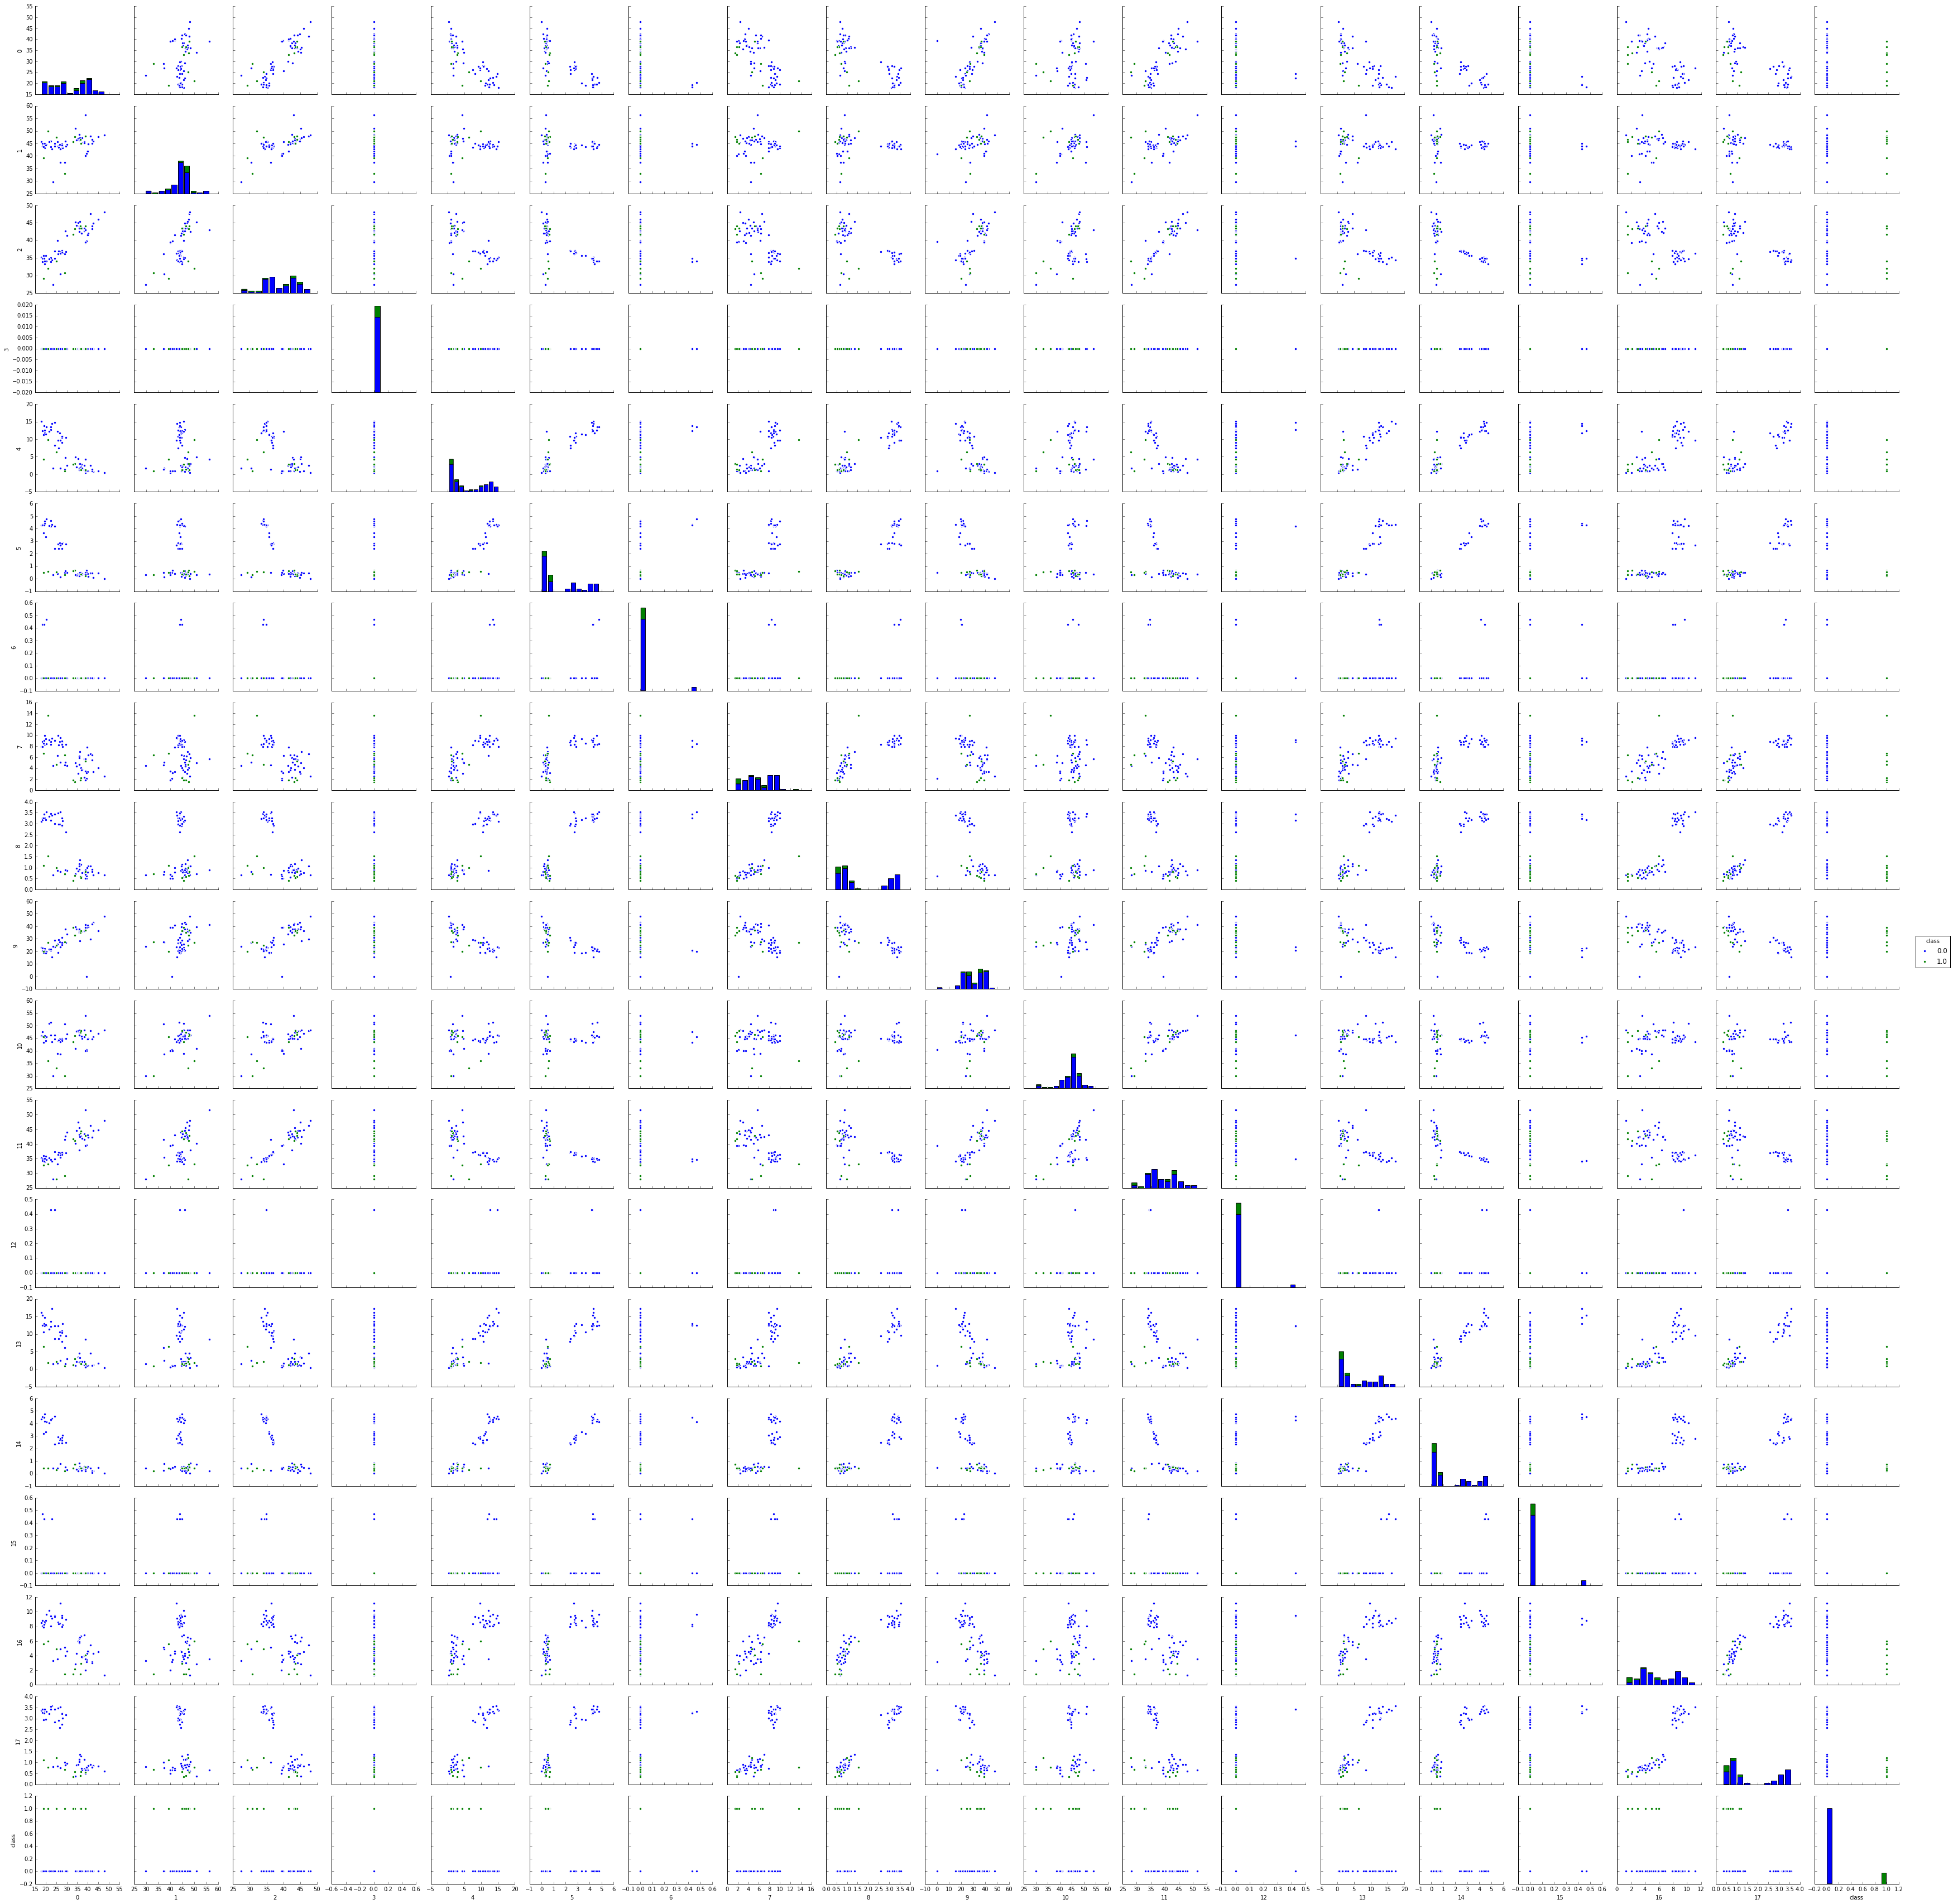

In [8]:
## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
sub_list=[]   
l=2

for i in train_set_list:
    #print(i)
    for a in np.arange(0,480,int(480/l)):
        #print(a)
        temp_sub =i[a:a+int(480/l)][['avg_rss12','var_rss12','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d2 = min(i[j])
        all_feature_list.append(temp_min_d2)
        
        temp_max_d2 = max(i[j])
        all_feature_list.append(temp_max_d2)
        
        temp_mean_d2 = i[j].mean()
        all_feature_list.append(temp_mean_d2)
        
#print(len(all_feature_list))

dataset_l_equals_2=[]
for a in range(0,len(all_feature_list),int(9*l)):
    #print(a)
    temp_everyrow=all_feature_list[a:a+int(9*l)]
    dataset_l_equals_2.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_2=pd.DataFrame(dataset_l_equals_2)
dataframe_dataset_l_equals_2['class']=train_dataset['class']
#print(dataframe_dataset_l_equals_2)

#print(dataframe_dataset_l_equals_2.mean())

sns.pairplot(dataframe_dataset_l_equals_2, hue='class', kind='scatter')
plt.show()



        


## iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression4 to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.5 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to de- termine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem.6 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.
### Answer: 
### right way: cross-validation before feature selection
### wrong way: feature selection before cross-validation

In [9]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV


## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 

best_number_feature_list=[]
all_cv_score=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_dataset['class']
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
    
    #first cv to split test and train set
    skf=StratifiedKFold(n_splits=5, random_state=None)
    
    temp_allfive_feature_number=[]
    temp_allfive_accuracy=[]
    for train_index, test_index in skf.split(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l):
#         print("TRAIN:", train_index, "TEST:", test_index)
        temp_x_train_set = X_dataframe_dataset_l_equals_l.loc[train_index]
        temp_y_train_set = Y_dataframe_dataset_l_equals_l.loc[train_index]
        temp_x_test_set = X_dataframe_dataset_l_equals_l.loc[test_index]
        temp_y_test_set = Y_dataframe_dataset_l_equals_l.loc[test_index]
#         print(temp_x_train_set)
#         print(temp_y_train_set)
#         print(temp_x_test_set)
#         print(temp_y_test_set)

## using rfecv to determine the optimal number of the feature selection
        logit = LogisticRegression(C=10000)
        rfecv = RFECV(logit, step=1, cv=StratifiedKFold(5),scoring='accuracy')
        rfecv.fit(temp_x_train_set, temp_y_train_set)
#         print("Optimal number of features:", rfecv.n_features_)
        temp_allfive_feature_number.append(rfecv.n_features_)
#         print(temp_allfive_feature_number)

#         print("Optimal number of features : %d" % rfecv.n_features_)
#         print("Ranking of features : %s" % rfecv.ranking_)

        # Plot number of features VS. cross-validation scores
#         plt.figure()
#         plt.xlabel("Number of features selected")
#         plt.ylabel("Cross validation score (nb of correct classifications)")
#         plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#         plt.show()
    
        
        rfe = RFE(logit, rfecv.n_features_)
        rfe = rfe.fit(temp_x_train_set, temp_y_train_set)
#         print (rfe.get_support())
#         print(rfe.ranking_)
#         print(rfe.score(temp_x_train_set,temp_y_train_set))
#         print(rfe.transform(temp_x_train_set))
        
        sel_temp_x_train_set=pd.DataFrame((rfe.transform(temp_x_train_set)))
        #print(sel_temp_x_train_set)
        sel_temp_x_test_set=pd.DataFrame((rfe.transform(temp_x_test_set)))
        #print(sel_temp_x_test_set)
        
        logit.fit(sel_temp_x_train_set, temp_y_train_set)
        #print(temp_y_test_set)
        predictions = logit.predict(sel_temp_x_test_set)
        #print(predictions)
        accuracy=logit.score(sel_temp_x_test_set, temp_y_test_set)
        #cv_score=cross_val_score(logit, sel_temp_x_test_set, temp_y_test_set, cv=1)
        #print(accuracy)
        #print(cv_score)
        temp_allfive_accuracy.append(accuracy)
        


    max_offive=max(temp_allfive_accuracy)
    index_max_offive=temp_allfive_accuracy.index(max(temp_allfive_accuracy))
    best_number_feature=temp_allfive_feature_number[index_max_offive]
    
#     print(temp_allfive_feature_number)
#     print(temp_allfive_accuracy)
#     print(max_offive)
#     print(index_max_offive)
#     print(best_number_feature)
    
#     print(mean_offive)
    all_cv_score.append(max_offive)
    best_number_feature_list.append(best_number_feature)
    
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
#print(len(dataframe_all_l))
#print(dataframe_all_l[2])
print('all score for the 20 l:')
print(all_cv_score)
print('all best number_feature for the each l:')
print(best_number_feature_list)


##best l selection and corresponding feature numbers
best_l_d3 = np.arange(1,21,1)[(all_cv_score.index(max(all_cv_score)))]
corresponding_feature_number_d3=best_number_feature_list[(all_cv_score.index(max(all_cv_score)))]
print("the best l is:", best_l_d3)
print("the number of feature selection for the best l is:", corresponding_feature_number_d3)
score_usingRFE=max(all_cv_score)
print("the corresponding score is:",score_usingRFE)






        


all score for the 20 l:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
all best number_feature for the each l:
[14, 12, 20, 5, 10, 15, 34, 33, 1, 27, 13, 31, 234, 27, 13, 11, 32, 12, 10, 9]
the best l is: 1
the number of feature selection for the best l is: 14
the corresponding score is: 1.0


In [10]:
##normalized data
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV


## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
best_number_feature_list=[]
all_cv_score=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_dataset['class']
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
###normalized data
    scaler_d3=preprocessing.MinMaxScaler()
    scaler_d3.fit(X_dataframe_dataset_l_equals_l)
    X_dataframe_dataset_l_equals_l = pd.DataFrame(scaler_d3.transform(X_dataframe_dataset_l_equals_l))
    
    
    #first cv to split test and train set
    skf=StratifiedKFold(n_splits=5, random_state=None)
    
    temp_allfive_feature_number=[]
    temp_allfive_accuracy=[]
    for train_index, test_index in skf.split(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l):
#         print("TRAIN:", train_index, "TEST:", test_index)
        temp_x_train_set = X_dataframe_dataset_l_equals_l.loc[train_index]
        temp_y_train_set = Y_dataframe_dataset_l_equals_l.loc[train_index]
        temp_x_test_set = X_dataframe_dataset_l_equals_l.loc[test_index]
        temp_y_test_set = Y_dataframe_dataset_l_equals_l.loc[test_index]
#         print(temp_x_train_set)
#         print(temp_y_train_set)
#         print(temp_x_test_set)
#         print(temp_y_test_set)

## using rfecv to determine the optimal number of the feature selection
        rfecv = RFECV(logit, step=1, cv=StratifiedKFold(5),scoring='accuracy')
        rfecv.fit(temp_x_train_set, temp_y_train_set)
#         print("Optimal number of features:", rfecv.n_features_)
        temp_allfive_feature_number.append(rfecv.n_features_)

#         print("Optimal number of features : %d" % rfecv.n_features_)
#         print("Ranking of features : %s" % rfecv.ranking_)

        # Plot number of features VS. cross-validation scores
#         plt.figure()
#         plt.xlabel("Number of features selected")
#         plt.ylabel("Cross validation score (nb of correct classifications)")
#         plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#         plt.show()

##normalized, normalized_temp_x_train_set, normalized_temp_x_test_set, temp_y_train_set, temp_x_test_set
#         scaler_d3=preprocessing.MinMaxScaler()
#         scaler_d3.fit(temp_x_train_set)
#         normalized_temp_x_train_set = pd.DataFrame(scaler_d3.transform(temp_x_train_set))
#         scaler_d3.fit(temp_x_test_set)
#         normalized_temp_x_test_set=pd.DataFrame(scaler_d3.transform(temp_x_test_set))
    
        logit = LogisticRegression(C=10000)
        rfe =RFE(logit, rfecv.n_features_)
        rfe = rfe.fit(temp_x_train_set, temp_y_train_set)
#         print (rfe.get_support())
#         print(rfe.ranking_)
#         print(rfe.score(temp_x_train_set,temp_y_train_set))
#         print(rfe.transform(temp_x_train_set))
        
        sel_temp_x_train_set=pd.DataFrame((rfe.transform(temp_x_train_set)))
        #print(sel_temp_x_train_set)
        sel_temp_x_test_set=pd.DataFrame((rfe.transform(temp_x_test_set)))
        #print(sel_temp_x_test_set)
        
        logit.fit(sel_temp_x_train_set, temp_y_train_set)
        #print(temp_y_test_set)
        predictions = logit.predict(sel_temp_x_test_set)
        #print(predictions)
        accuracy=logit.score(sel_temp_x_test_set, temp_y_test_set)
        #cv_score=cross_val_score(logit, sel_temp_x_test_set, temp_y_test_set, cv=1)
        #print(accuracy)
        #print(cv_score)
        temp_allfive_accuracy.append(accuracy)
        


    max_offive=max(temp_allfive_accuracy)
    index_max_offive=temp_allfive_accuracy.index(max(temp_allfive_accuracy))
    best_number_feature=temp_allfive_feature_number[index_max_offive]
    
#     print(temp_allfive_feature_number)
#     print(temp_allfive_accuracy)
#     print(max_offive)
#     print(index_max_offive)
#     print(best_number_feature)
    
#     print(mean_offive)
    all_cv_score.append(max_offive)
    best_number_feature_list.append(best_number_feature)
    
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
#print(len(dataframe_all_l))
#print(dataframe_all_l[2])
print('all score for the 20 l using normalized data:')
print(all_cv_score)
print('all best number_feature for the each l:')
print(best_number_feature_list)


##best l selection and corresponding feature numbers
best_l_d3_n = np.arange(1,21,1)[(all_cv_score.index(max(all_cv_score)))]
corresponding_feature_number_d3_n=best_number_feature_list[(all_cv_score.index(max(all_cv_score)))]
print("the best l for the normalized data is:", best_l_d3_n)
print("the number of feature selection for the best l is:", corresponding_feature_number_d3_n)
score_usingRFE_n=max(all_cv_score)
print("the corresponding score is:",score_usingRFE_n)






        


all score for the 20 l using normalized data:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
all best number_feature for the each l:
[12, 16, 6, 5, 13, 17, 81, 14, 16, 13, 6, 1, 9, 5, 6, 6, 7, 1, 1, 1]
the best l for the normalized data is: 1
the number of feature selection for the best l is: 12
the corresponding score is: 1.0


## iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import statsmodels.discrete.discrete_model as smd



x_train_list=[]
y_train_list=[]
x_test_list=[]
y_test_list=[]
sub_list=[] 
l=best_l_d3
print("best_l is:")
print(l)
for i in train_set_list: 
        #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d3 = min(i[j])
        #temp_min_d3=np.median(i[j])
        all_feature_list.append(temp_min_d3)

        temp_max_d3 = max(i[j])
        all_feature_list.append(temp_max_d3)

        temp_mean_d3 = i[j].mean()
        all_feature_list.append(temp_mean_d3)

#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
    #print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=train_dataset['class']
X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
#print(dataframe_dataset_l_equals_l)
#print(X_dataframe_dataset_l_equals_l)
#print(Y_dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

    
# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()
    
skf=StratifiedKFold(n_splits=5,random_state=None)
    
temp_allfive_accuracy=[]
for train_index, test_index in skf.split(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l):
#     print("TRAIN:", train_index, "TEST:", test_index)
    temp_x_train_set = X_dataframe_dataset_l_equals_l.loc[train_index]
    temp_y_train_set = Y_dataframe_dataset_l_equals_l.loc[train_index]
    temp_x_test_set = X_dataframe_dataset_l_equals_l.loc[test_index]
    temp_y_test_set = Y_dataframe_dataset_l_equals_l.loc[test_index]
#     print(temp_x_train_set)
#     print(temp_y_train_set)
#     print(temp_x_test_set)
#     print(temp_y_test_set)
    x_train_list.append(temp_x_train_set)
    y_train_list.append(temp_y_train_set)
    x_test_list.append(temp_x_test_set)
    y_test_list.append(temp_y_test_set)
    


    
    logit = LogisticRegression(C=10000)
    rfe =RFE(logit, corresponding_feature_number_d3)
    rfe = rfe.fit(temp_x_train_set, temp_y_train_set)
#     print (rfe.get_support())
#     print(rfe.ranking_)
#     print(rfe.get_params())
#     print(rfe.score(temp_x_train_set,temp_y_train_set))
#     print(rfe.transform(temp_x_train_set))
        
    sel_temp_x_train_set=pd.DataFrame((rfe.transform(temp_x_train_set)))
    #print(sel_temp_x_train_set)
    sel_temp_x_test_set=pd.DataFrame((rfe.transform(temp_x_test_set)))
    #print(sel_temp_x_test_set)
        
    logit.fit(sel_temp_x_train_set, temp_y_train_set)
    #print(temp_y_test_set)
    #predictions = logit.predict(sel_temp_x_test_set)
    #print(predictions)
    accuracy=logit.score(sel_temp_x_test_set, temp_y_test_set)
#     cv_score=cross_val_score(logit, sel_temp_x_test_set, temp_y_test_set, cv=2)
    #print(accuracy)
    #print(cv_score)
    #print(cv_score)
    temp_allfive_accuracy.append(accuracy)
print("five accuracy when l equals",best_l_d3,':')
print(temp_allfive_accuracy)

index =temp_allfive_accuracy.index(max(temp_allfive_accuracy))
#print(index)



best_x_train_set=x_train_list[index]
best_y_train_set=y_train_list[index]
best_x_test_set=x_test_list[index]
best_y_test_set=y_test_list[index]

best_logit=LogisticRegression(C=10000)
best_rfe =RFE(best_logit, corresponding_feature_number_d3)
best_rfe = best_rfe.fit(best_x_train_set, best_y_train_set)
#print (best_rfe.get_support())
#print(len(best_rfe.get_support()))



sel_feature_list=[]

#print(m)
for i in np.arange(0,len(best_rfe.get_support()),1):
    if list(best_rfe.get_support())[i]== True:
        sel_feature_list.append(i)

print("the column number of the selected features:")
print(sel_feature_list)


        




best_l is:
1
five accuracy when l equals 1 :
[1.0, 1.0, 0.7857142857142857, 0.9285714285714286, 1.0]
the column number of the selected features:
[0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17]


the confusion matrix is:
[[60  0]
 [ 0  9]]


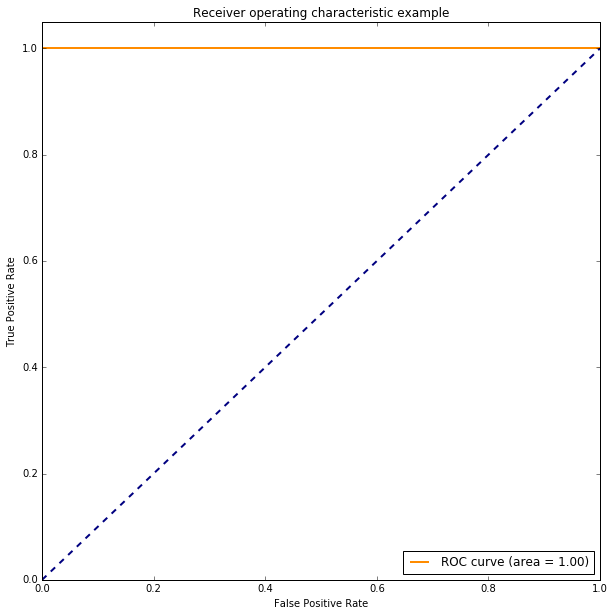

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 28
         Gradient evaluations: 50
         Hessian evaluations: 23
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                           13
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                   1.000
Time:                        21:31:50   Log-Likelihood:            -2.3643e-05
converged:                       True   LL-Null:                       -26.718
                                        LLR p-value:                 7.589e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0    

In [12]:
from sklearn.metrics import confusion_matrix

##当l=2,dataframe_all_l[13]  
# print(dataframe_all_l[14-1])
# print(l)
new_train_data_set=dataframe_all_l[l-1]
#print(dataframe_all_l[l-1])
x_new_train_data_set=new_train_data_set[sel_feature_list]
# print(type(x_new_train_data_set))
y_new_train_data_set=new_train_data_set[['class']]
# print(x_new_train_data_set)
# print(y_new_train_data_set)

logit1=LogisticRegression(C=10000)
logit1.fit(x_new_train_data_set,np.ravel(y_new_train_data_set))
predict=logit1.predict(x_new_train_data_set)
#print(predict)
acc=logit1.score(x_new_train_data_set,y_new_train_data_set)
#print(acc)

#confusion_matrix
confusion_matrix=confusion_matrix(y_new_train_data_set, predict)
print("the confusion matrix is:")
print(confusion_matrix)


y_score = logit1.fit(x_new_train_data_set, np.ravel(y_new_train_data_set)).decision_function(x_new_train_data_set)

fpr,tpr,threshold = roc_curve(y_new_train_data_set, y_score) 
roc_auc = auc(fpr,tpr) 


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()




# X = smd.add_constant(x_new_train_data_set)      
results = smd.Logit(y_new_train_data_set, x_new_train_data_set).fit(method='ncg')
results.summary()
print(results.summary())
print()



## v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [13]:
## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
sub_list=[]   
l=best_l_d3
print("best l is:",l)


for i in test_set_list:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l+1)][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d2 = min(i[j])
        all_feature_list.append(temp_min_d2)
        
        temp_max_d2 = max(i[j])
        all_feature_list.append(temp_max_d2)
        
        temp_mean_d2 = i[j].mean()
        all_feature_list.append(temp_mean_d2)
        
#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
#     print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=test_dataset['class']
#print(dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()

print(sel_feature_list)
x_new_test_data_set=dataframe_dataset_l_equals_l[sel_feature_list]
# print(ty(x_new_train_data_set))
y_new_test_data_set=dataframe_dataset_l_equals_l[['class']]

logit1=LogisticRegression(C=10000)
logit1.fit(x_new_train_data_set,np.ravel(y_new_train_data_set))
# predict=logit1.predict(x_new_train_data_set)
#print(predict)
acc_test=logit1.score(x_new_test_data_set,y_new_test_data_set)
print("the accuracy of the test set is:", acc_test)
print("the accuracy of the training set is:", acc)

        


best l is: 1
[0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17]
the accuracy of the test set is: 1.0
the accuracy of the training set is: 1.0


## vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

## Answer: My classes are well-separated because I use the Stratified CV, spliting the training set by preserving the percentage of samples for each class.

## vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.
## Answer: Yes, I see the imbalanced classes.

In [14]:
#9/60   4/15
from imblearn.over_sampling import SMOTE


# scaler_d6=preprocessing.MinMaxScaler()
# scaler_d6.fit(x_new_test_data_set)
# normalized_x_new_test_data_set = pd.DataFrame(scaler_d4.transform(x_new_test_data_set))
# # print(normalized_x_new_train_data_set)
# # print(x_new_train_data_set)
# # print(y_new_train_data_set)
# # print(normalized_x_new_test_data_set)
# # print(x_new_test_data_set)
# # print(y_new_test_data_set)



best_number_feature_list=[]
all_cv_score=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_dataset['class']
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
    ###smote
    
    smote = SMOTE(random_state=2)
    X_dataframe_dataset_l_equals_l_smote, Y_dataframe_dataset_l_equals_l_smote= smote.fit_sample(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
    X_dataframe_dataset_l_equals_l_smote=pd.DataFrame(X_dataframe_dataset_l_equals_l_smote)
    Y_dataframe_dataset_l_equals_l_smote=pd.DataFrame(Y_dataframe_dataset_l_equals_l_smote)
    
    skf=StratifiedKFold(n_splits=5,random_state=None)
    
    temp_allfive_accuracy=[]
    for train_index, test_index in skf.split(X_dataframe_dataset_l_equals_l_smote, Y_dataframe_dataset_l_equals_l_smote):
#         print("TRAIN:", train_index, "TEST:", test_index)
        temp_x_train_set = X_dataframe_dataset_l_equals_l_smote.loc[train_index]
        temp_y_train_set = Y_dataframe_dataset_l_equals_l_smote.loc[train_index]
        temp_x_test_set = X_dataframe_dataset_l_equals_l_smote.loc[test_index]
        temp_y_test_set = Y_dataframe_dataset_l_equals_l_smote.loc[test_index]
#         print(temp_x_train_set)
#         print(temp_y_train_set)
#         print(temp_x_test_set)
#         print(temp_y_test_set)

## using rfecv to determine the optimal number of the feature selection
        rfecv = RFECV(logit, step=1, cv=StratifiedKFold(5),scoring='accuracy')
        rfecv.fit(temp_x_train_set, np.ravel(temp_y_train_set))
#         print("Optimal number of features:", rfecv.n_features_)
        temp_allfive_feature_number.append(rfecv.n_features_)

#         print("Optimal number of features : %d" % rfecv.n_features_)
#         print("Ranking of features : %s" % rfecv.ranking_)

        # Plot number of features VS. cross-validation scores
#         plt.figure()
#         plt.xlabel("Number of features selected")
#         plt.ylabel("Cross validation score (nb of correct classifications)")
#         plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#         plt.show()

    
        logit = LogisticRegression(C=10000)
        rfe =RFE(logit, rfecv.n_features_)
        rfe = rfe.fit(temp_x_train_set, np.ravel(temp_y_train_set))
#         print (rfe.get_support())
#         print(rfe.ranking_)
#         print(rfe.get_params())
#         print(rfe.score(temp_x_train_set,temp_y_train_set))
#         print(rfe.transform(temp_x_train_set))
        
        sel_temp_x_train_set=pd.DataFrame((rfe.transform(temp_x_train_set)))
        #print(sel_temp_x_train_set)
        sel_temp_x_test_set=pd.DataFrame((rfe.transform(temp_x_test_set)))
        #print(sel_temp_x_test_set)
        
        logit.fit(sel_temp_x_train_set, np.ravel(temp_y_train_set))
        #print(temp_y_test_set)
        predictions = logit.predict(sel_temp_x_test_set)
        #print(predictions)
        accuracy=logit.score(sel_temp_x_test_set, temp_y_test_set)
        #cv_score=cross_val_score(logit, sel_temp_x_test_set, temp_y_test_set, cv=1)
        #print(accuracy)
        #print(cv_score)
        temp_allfive_accuracy.append(accuracy)
        


    max_offive=max(temp_allfive_accuracy)
#     print(mean_offive)
    index_max_offive=temp_allfive_accuracy.index(max(temp_allfive_accuracy))
    best_number_feature=temp_allfive_feature_number[index_max_offive]
    
    all_cv_score.append(max_offive)
    best_number_feature_list.append(best_number_feature)
    
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
#print(len(dataframe_all_l))
#print(dataframe_all_l[2])

print('all score for the 20 l:')
print(all_cv_score)
print('all best number_feature for the each l:')
print(best_number_feature_list)


##best l selection and corresponding feature numbers
best_l_d6 = np.arange(1,21,1)[(all_cv_score.index(max(all_cv_score)))]
corresponding_feature_number_d6=best_number_feature_list[(all_cv_score.index(max(all_cv_score)))]
print("the best l is:", best_l_d6)
print("the number of feature selection for the best l is:", corresponding_feature_number_d6)
score_usingsmote=max(all_cv_score)
print("the corresponding score is:",score_usingsmote)






all score for the 20 l:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
all best number_feature for the each l:
[1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
the best l is: 1
the number of feature selection for the best l is: 1
the corresponding score is: 1.0


In [15]:
print(best_l_d6)

1


In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import statsmodels.discrete.discrete_model as smd


x_train_list=[]
y_train_list=[]
x_test_list=[]
y_test_list=[]
sub_list=[] 
l=best_l_d6
print("best_l is:")
print(l)
for i in train_set_list:
        #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d3 = min(i[j])
        #temp_min_d3=np.median(i[j])
        all_feature_list.append(temp_min_d3)

        temp_max_d3 = max(i[j])
        all_feature_list.append(temp_max_d3)

        temp_mean_d3 = i[j].mean()
        all_feature_list.append(temp_mean_d3)

#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
    #print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=train_dataset['class']
X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
#print(dataframe_dataset_l_equals_l)
#print(X_dataframe_dataset_l_equals_l)
#print(Y_dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

    
# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()

smote = SMOTE(random_state=2)
X_dataframe_dataset_l_equals_l_smote, Y_dataframe_dataset_l_equals_l_smote= smote.fit_sample(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
X_dataframe_dataset_l_equals_l_smote=pd.DataFrame(X_dataframe_dataset_l_equals_l_smote)
Y_dataframe_dataset_l_equals_l_smote=pd.DataFrame(Y_dataframe_dataset_l_equals_l_smote)
    
    
skf=StratifiedKFold(n_splits=5,random_state=None)
    
temp_allfive_accuracy=[]
for train_index, test_index in skf.split(X_dataframe_dataset_l_equals_l_smote, Y_dataframe_dataset_l_equals_l_smote):
#     print("TRAIN:", train_index, "TEST:", test_index)
    temp_x_train_set = X_dataframe_dataset_l_equals_l_smote.loc[train_index]
    temp_y_train_set = Y_dataframe_dataset_l_equals_l_smote.loc[train_index]
    temp_x_test_set = X_dataframe_dataset_l_equals_l_smote.loc[test_index]
    temp_y_test_set = Y_dataframe_dataset_l_equals_l_smote.loc[test_index]
#     print(temp_x_train_set)
#     print(temp_y_train_set)
#     print(temp_x_test_set)
#     print(temp_y_test_set)
    x_train_list.append(temp_x_train_set)
    y_train_list.append(temp_y_train_set)
    x_test_list.append(temp_x_test_set)
    y_test_list.append(temp_y_test_set)
    


    
    logit = LogisticRegression(C=10000)
    rfe =RFE(logit, corresponding_feature_number_d6)
    rfe = rfe.fit(temp_x_train_set, np.ravel(temp_y_train_set))
#     print (rfe.get_support())
#     print(rfe.ranking_)
#     print(rfe.get_params())
#     print(rfe.score(temp_x_train_set,temp_y_train_set))
#     print(rfe.transform(temp_x_train_set))
        
    sel_temp_x_train_set=pd.DataFrame((rfe.transform(temp_x_train_set)))
    #print(sel_temp_x_train_set)
    sel_temp_x_test_set=pd.DataFrame((rfe.transform(temp_x_test_set)))
    #print(sel_temp_x_test_set)
        
    logit.fit(sel_temp_x_train_set, np.ravel(temp_y_train_set))
    #print(temp_y_test_set)
    #predictions = logit.predict(sel_temp_x_test_set)
    #print(predictions)
    accuracy=logit.score(sel_temp_x_test_set, temp_y_test_set)
#     cv_score=cross_val_score(logit, sel_temp_x_test_set, temp_y_test_set, cv=2)
    #print(accuracy)
    #print(cv_score)
    #print(cv_score)
    temp_allfive_accuracy.append(accuracy)
print("five accuracy when l equals",best_l_d6,':')
print(temp_allfive_accuracy)

index =temp_allfive_accuracy.index(max(temp_allfive_accuracy))
print("the index of the higest accuracy:")
print(index)



best_x_train_set=x_train_list[index]
best_y_train_set=y_train_list[index]
best_x_test_set=x_test_list[index]
best_y_test_set=y_test_list[index]

best_logit=LogisticRegression(C=10000)
best_rfe =RFE(best_logit, corresponding_feature_number_d6)
best_rfe = best_rfe.fit(best_x_train_set, np.ravel(best_y_train_set))
#print (best_rfe.get_support())
# print(len(best_rfe.get_support()))

sel_feature_list=[]
m=np.arange(0,len(best_rfe.get_support()),1)
#print(m)
for i in m:
    if list(best_rfe.get_support())[i]== True:
        sel_feature_list.append(i)

print("the column number of the selected features:")
print(sel_feature_list)
        



best_l is:
1
five accuracy when l equals 1 :
[0.4166666666666667, 0.7916666666666666, 0.8333333333333334, 0.9166666666666666, 0.5416666666666666]
the index of the higest accuracy:
3
the column number of the selected features:
[12]


the confusion matrix is:
[[60  0]
 [ 0 60]]


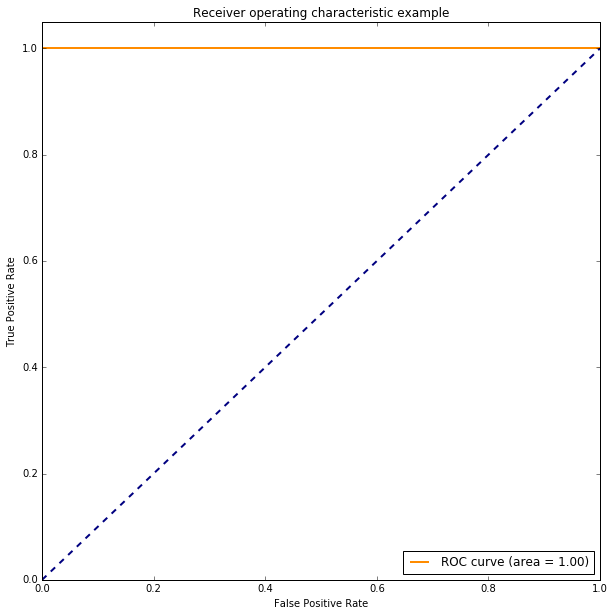

In [17]:
from sklearn.metrics import confusion_matrix



logit1=LogisticRegression(C=10000)
logit1.fit(X_dataframe_dataset_l_equals_l_smote,np.ravel(Y_dataframe_dataset_l_equals_l_smote))
predict=logit1.predict(X_dataframe_dataset_l_equals_l_smote)
#print(predict)
acc=logit1.score(X_dataframe_dataset_l_equals_l_smote,Y_dataframe_dataset_l_equals_l_smote)
#print(acc)

#confusion_matrix
confusion_matrix=confusion_matrix(Y_dataframe_dataset_l_equals_l_smote, predict)
print("the confusion matrix is:")
print(confusion_matrix)


y_score = logit1.fit(X_dataframe_dataset_l_equals_l_smote, np.ravel(Y_dataframe_dataset_l_equals_l_smote)).decision_function(X_dataframe_dataset_l_equals_l_smote)

fpr,tpr,threshold = roc_curve(Y_dataframe_dataset_l_equals_l_smote, y_score) 
roc_auc = auc(fpr,tpr) 


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()




  
# results = smd.Logit(Y_dataframe_dataset_l_equals_l_smote,X_dataframe_dataset_l_equals_l_smote ).fit(method='ncg')
# results.summary()
# print(results.summary())

# #normalized data
# scaler_d4=preprocessing.MinMaxScaler()
# scaler_d4.fit(X_dataframe_dataset_l_equals_l_smote)
# normalized_x_new_train_data_set = pd.DataFrame(scaler_d4.transform(X_dataframe_dataset_l_equals_l_smote))


# print("using normalized data:")
# results_n = smd.Logit(Y_dataframe_dataset_l_equals_l_smote, normalized_x_new_train_data_set).fit(method='ncg')
# print(results_n.summary())


## (e) Binary Classification Using L1-penalized logistic regression


## i. Repeat 1(d)iii using L1-penalized logistic regression,7 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.8

In [18]:
from sklearn.linear_model import LogisticRegressionCV

## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
all_error_rate=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_dataset['class']
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
    
    logitcv= LogisticRegressionCV(penalty='l1',cv=5,solver='liblinear',multi_class='ovr')
    logitcv.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
    predictions = logitcv.predict(X_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
    error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
    error_rate=error/len(predictions)
#     print(error)
#     print(error_rate)
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
    all_error_rate.append(error_rate)

print(all_error_rate)

best_l_e1=np.arange(1,21,1)[(all_error_rate.index(min(all_error_rate)))]
print("the best l is:",best_l_e1)
score_usingl1penalty=1-min(all_error_rate)
print("the corresponding score is:", score_usingl1penalty)

        


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
the best l is: 1
the corresponding score is: 1.0


## ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?
## Answer: In this case, they have the almost same performance shown by the accuracy. But, I use RFE to find the best l before. So, in my opinion, L1-penalized performs better than RFE. In addtion, L1-penalized run faster than RFE.

In [19]:
print("the score using RFE is:", score_usingRFE)
print("the score using l1penalty is:",score_usingl1penalty)

the score using RFE is: 1.0
the score using l1penalty is: 1.0


## (f) Multi-class Classification (The Realistic Case)

## i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set.9 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [20]:
# bending 1, cycling 2, lying 3, sitting 4, standing 5, walking 6

bending_train_set_path = []
bending_test_set_path = []
cycling_test_set_path = []
cycling_train_set_path = []
lying_train_set_path = []
lying_test_set_path = []

sitting_test_set_path = []
sitting_train_set_path = []
standing_train_set_path = []
standing_test_set_path = []
walking_test_set_path = []
walking_train_set_path = []


for folder_name in Root[1:]:
    #print (foldName)
    temp = os.path.join('%s%s' %(path, folder_name))
    #print(temp)
    feature_path = os.listdir(temp+'/')
    if (folder_name == 'bending1' or folder_name == 'bending2'):
        for i in range(0,2):
            bending_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(2,len(feature_path)):
            bending_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
    elif (folder_name == 'cycling'):
        for i in range(0,3):
            cycling_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(feature_path)):
            cycling_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
    elif(folder_name == 'lying'):
        for i in range(0,3):
            lying_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(feature_path)):
            lying_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
    elif(folder_name == 'sitting'):
        for i in range(0,3):
            sitting_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(feature_path)):
            sitting_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
    elif(folder_name == 'standing'):
        for i in range(0,3):
            standing_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(feature_path)):
            standing_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
    elif(folder_name == 'walking'):
        for i in range(0,3):
            walking_test_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(feature_path)):
            walking_train_set_path.append('/Users/irischeng/INF552/HOMEWORK/homework3/AReM/'+folder_name+'/dataset'+str(i+1)+'.csv')


train_set_list_f1 = [] 
for i in train_set_path:
    #print(i)
    temp_df = pd.read_csv(i, skiprows=5, names = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
    if i in bending_train_set_path:
        temp_df['class']=1
    elif i in cycling_train_set_path:
        temp_df['class']=2
    elif i in lying_train_set_path:
        temp_df['class']=3
    elif i in sitting_train_set_path:
        temp_df['class']=4
    elif i in standing_train_set_path:
        temp_df['class']=5
    elif i in walking_train_set_path:
        temp_df['class']=6
    #print(temp_df)
    train_set_list_f1.append(temp_df)
    
#print(train_set_list)
#print(len(train_set_list))

#test_set_list has 19 dataframe
test_set_list_f1 = []
for i in test_set_path:
#     print(i)
    temp_df = pd.read_csv(i, skiprows=5, names = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
    if i in bending_test_set_path:
        temp_df['class']=1
    elif i in cycling_test_set_path:
        temp_df['class']=2
    elif i in lying_test_set_path:
        temp_df['class']=3
    elif i in sitting_test_set_path:
        temp_df['class']=4
    elif i in standing_test_set_path:
        temp_df['class']=5
    elif i in walking_test_set_path:
        temp_df['class']=6
#     print(temp_df)
    test_set_list_f1.append(temp_df)
    
#print(len(test_set_list_f1))
    


In [21]:
train_set_class=[]
for i in train_set_list_f1:
    mean=i['class'].mean()
    train_set_class.append(mean)
    
# print(train_set_class)

test_set_class=[]
for i in test_set_list_f1:
    #print(i)
    
    mean_t=i['class'].mean()
    test_set_class.append(mean_t)

# print(test_set_class)

In [22]:
from sklearn.linear_model import LogisticRegressionCV
import warnings

warnings.filterwarnings("ignore")

## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
all_error_rate=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list_f1:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_set_class
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
    
    logitcv= LogisticRegressionCV(penalty='l1',cv=5,solver='saga',multi_class='multinomial')
    logitcv.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
    predictions = logitcv.predict(X_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
    error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
    error_rate=error/len(predictions)
#     print(error)
#     print(error_rate)
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
    all_error_rate.append(error_rate)

print(all_error_rate)

best_l_f1=np.arange(1,21,1)[(all_error_rate.index(min(all_error_rate)))]
print("the best l is:",best_l_f1)
score_using_mul=1-min(all_error_rate)
print("the corresponding score is:", score_using_mul)

        


[0.014492753623188406, 0.014492753623188406, 0.0, 0.028985507246376812, 0.0, 0.0, 0.057971014492753624, 0.043478260869565216, 0.028985507246376812, 0.0, 0.0, 0.014492753623188406, 0.0, 0.0, 0.014492753623188406, 0.0, 0.0, 0.0, 0.014492753623188406, 0.0]
the best l is: 3
the corresponding score is: 1.0


In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
# all_error_rate=[]
# dataframe_all_l=[]
# for l in np.arange(1,21,1):
#     print(l)
sub_list=[] 
l=best_l_f1
for i in train_set_list_f1:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d3 = min(i[j])
        #temp_min_d3=np.median(i[j])
        all_feature_list.append(temp_min_d3)

        temp_max_d3 = max(i[j])
        all_feature_list.append(temp_max_d3)

        temp_mean_d3 = i[j].mean()
        all_feature_list.append(temp_mean_d3)

#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
    #print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=train_set_class
X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
#print(dataframe_dataset_l_equals_l)
# print(X_dataframe_dataset_l_equals_l)
# print(Y_dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

    
# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()
    
    
logitcv= LogisticRegressionCV(penalty='l1',cv=5,solver='saga',multi_class='multinomial')
logitcv.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
predictions = logitcv.predict(X_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
error_rate=error/len(predictions)
# print("test error is:")
# print(error_rate)
Y_dataframe_dataset_l_equals_l_value=Y_dataframe_dataset_l_equals_l.values
##confusion matrix
# cm_testdata=confusion_matrix(test_true_class,pre_test)
# print(Y_dataframe_dataset_l_equals_l_value)
# print(predictions)
cm=confusion_matrix(Y_dataframe_dataset_l_equals_l_value,predictions)
print("confusion matrix of training is:")
print(cm)
classes=['bending','cycling','lying','sitting','standing','walking']



 



        


confusion matrix of training is:
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


In [24]:

sub_list=[]   
l=best_l_f1
print("best l is:",l)


for i in test_set_list_f1:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l+1)][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d2 = min(i[j])
        all_feature_list.append(temp_min_d2)
        
        temp_max_d2 = max(i[j])
        all_feature_list.append(temp_max_d2)
        
        temp_mean_d2 = i[j].mean()
        all_feature_list.append(temp_mean_d2)
        
#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
#     print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
x_dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=test_set_class
y_dataframe_dataset_l_equals_l=test_set_class
#print(dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()

logitcv= LogisticRegressionCV(penalty='l1',cv=5,solver='saga',multi_class='multinomial')
logitcv.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
predictions = logitcv.predict(x_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
error = (y_dataframe_dataset_l_equals_l!=predictions).sum()
error_rate=error/len(predictions)
print("test error is:")
print(error_rate)
##confusion matrix
# cm_testdata=confusion_matrix(test_true_class,pre_test)
# print(Y_dataframe_dataset_l_equals_l_value)
# print(predictions)
cm=confusion_matrix(y_dataframe_dataset_l_equals_l,predictions)
print("confusion matrix of test is:")
print(cm)
classes=['bending','cycling','lying','sitting','standing','walking']



        


best l is: 3
test error is:
0.15789473684210525
confusion matrix of test is:
[[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]


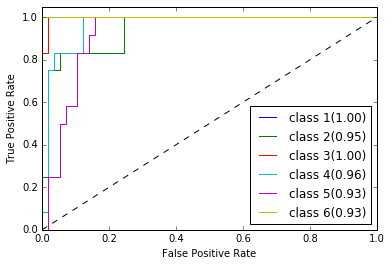

In [25]:
#####training 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


y_scores=logitcv.decision_function(X_dataframe_dataset_l_equals_l)
fp_rate=dict()
tp_rate=dict()
R_Auc=dict()
#print(y_scores)

for i in np.arange(1,7,1):
    fp_rate[i], tp_rate[i], _= roc_curve(Y_dataframe_dataset_l_equals_l.values, y_scores[:, i-1],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    
plt.figure()
plt.plot(fp_rate[1],tp_rate[1],label='class 1(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 2(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 3(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 4(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 5(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 6(%0.2f)'%R_Auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#ROC_plot


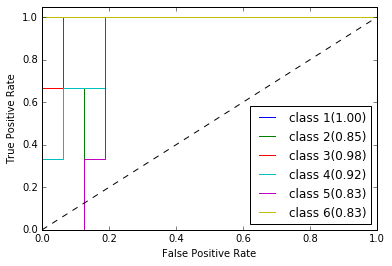

In [26]:
#### test
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



y_scores=logitcv.decision_function(x_dataframe_dataset_l_equals_l)
fp_rate=dict()
tp_rate=dict()
R_Auc=dict()
#print(y_scores)

for i in np.arange(1,7,1):
    fp_rate[i], tp_rate[i], _= roc_curve(y_dataframe_dataset_l_equals_l, y_scores[:, i-1],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    
plt.figure()
plt.plot(fp_rate[1],tp_rate[1],label='class 1(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 2(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 3(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 4(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 5(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 6(%0.2f)'%R_Auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#ROC_plot

## ii. Repeat 1(f)i using a Naive Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### GaussianNB


In [28]:

## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
all_error_rate=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list_f1:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_set_class
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
    Gauss=GaussianNB()
    Gauss.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
    predictions = Gauss.predict(X_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
    error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
    error_rate=error/len(predictions)
#     print(error)
#     print(error_rate)
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
    all_error_rate.append(error_rate)

print(all_error_rate)

best_l_f2=np.arange(1,21,1)[(all_error_rate.index(min(all_error_rate)))]
print("the best l is:",best_l_f2)
score_usingGauss=1-min(all_error_rate)
print("the corresponding score is:", score_usingGauss)

        


[0.043478260869565216, 0.014492753623188406, 0.028985507246376812, 0.057971014492753624, 0.07246376811594203, 0.043478260869565216, 0.043478260869565216, 0.028985507246376812, 0.014492753623188406, 0.057971014492753624, 0.057971014492753624, 0.043478260869565216, 0.0, 0.014492753623188406, 0.028985507246376812, 0.028985507246376812, 0.0, 0.028985507246376812, 0.0, 0.0]
the best l is: 13
the corresponding score is: 1.0


In [29]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
# all_error_rate=[]
# dataframe_all_l=[]
# for l in np.arange(1,21,1):
#     print(l)
sub_list=[] 
l=best_l_f2
for i in train_set_list_f1:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d3 = min(i[j])
        #temp_min_d3=np.median(i[j])
        all_feature_list.append(temp_min_d3)

        temp_max_d3 = max(i[j])
        all_feature_list.append(temp_max_d3)

        temp_mean_d3 = i[j].mean()
        all_feature_list.append(temp_mean_d3)

#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
    #print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=train_set_class
X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
#print(dataframe_dataset_l_equals_l)
# print(X_dataframe_dataset_l_equals_l)
# print(Y_dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

    
# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()
    
Gauss=GaussianNB()
Gauss.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
predictions = Gauss.predict(X_dataframe_dataset_l_equals_l)
error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
error_rate=error/len(predictions)
print("train error is:")
print(error_rate)
Y_dataframe_dataset_l_equals_l_value=Y_dataframe_dataset_l_equals_l.values
##confusion matrix
# cm_testdata=confusion_matrix(test_true_class,pre_test)
# print(Y_dataframe_dataset_l_equals_l_value)
# print(predictions)
cm=confusion_matrix(Y_dataframe_dataset_l_equals_l_value,predictions)
print("confusion matrix of training is:")
print(cm)
classes=['bending','cycling','lying','sitting','standing','walking']


train error is:
0.0
confusion matrix of training is:
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


In [30]:

sub_list=[]   
l=best_l_f2
print("best l is:",l)


for i in test_set_list_f1:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l+1)][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d2 = min(i[j])
        all_feature_list.append(temp_min_d2)
        
        temp_max_d2 = max(i[j])
        all_feature_list.append(temp_max_d2)
        
        temp_mean_d2 = i[j].mean()
        all_feature_list.append(temp_mean_d2)
        
#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
#     print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
x_dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=test_set_class
y_dataframe_dataset_l_equals_l=test_set_class
#print(dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()

logitcv= LogisticRegressionCV(penalty='l1',cv=5,solver='saga',multi_class='multinomial')
logitcv.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
predictions = logitcv.predict(x_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
error = (y_dataframe_dataset_l_equals_l!=predictions).sum()
error_rate=error/len(predictions)
print("test error is:")
print(error_rate)
##confusion matrix
# cm_testdata=confusion_matrix(test_true_class,pre_test)
# print(Y_dataframe_dataset_l_equals_l_value)
# print(predictions)
cm=confusion_matrix(y_dataframe_dataset_l_equals_l,predictions)
print("confusion matrix of test is:")
print(cm)
classes=['bending','cycling','lying','sitting','standing','walking']



        


best l is: 13
test error is:
0.10526315789473684
confusion matrix of test is:
[[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


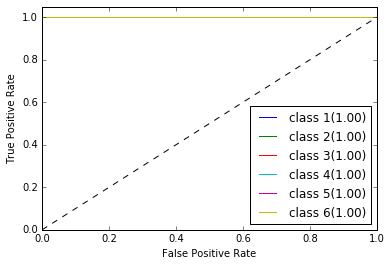

In [31]:
#### training
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



y_scores=Gauss.predict_proba(X_dataframe_dataset_l_equals_l)
fp_rate=dict()
tp_rate=dict()
R_Auc=dict()
#print(y_scores)

for i in np.arange(1,7,1):
    fp_rate[i], tp_rate[i], _= roc_curve(Y_dataframe_dataset_l_equals_l.values, y_scores[:, i-1],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    
plt.figure()
plt.plot(fp_rate[1],tp_rate[1],label='class 1(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 2(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 3(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 4(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 5(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 6(%0.2f)'%R_Auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#ROC_plot

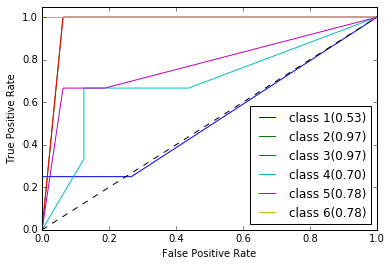

In [32]:
### test
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



y_scores=Gauss.predict_proba(x_dataframe_dataset_l_equals_l)
fp_rate=dict()
tp_rate=dict()
R_Auc=dict()
#print(y_scores)

for i in np.arange(1,7,1):
    fp_rate[i], tp_rate[i], _= roc_curve(y_dataframe_dataset_l_equals_l, y_scores[:, i-1],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    
plt.figure()
plt.plot(fp_rate[1],tp_rate[1],label='class 1(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 2(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 3(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 4(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 5(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 6(%0.2f)'%R_Auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#ROC_plot

### Multinomial priors 

In [33]:

## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
all_error_rate=[]
dataframe_all_l=[]
for l in np.arange(1,21,1):
#     print(l)
    sub_list=[] 

    for i in train_set_list_f1:
        #print(i)
        for a in np.arange(0,480,int(480/l)+1):
            #print(a)
#             temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
            temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
            #print(temp_sub)
            sub_list.append(temp_sub)

    #print(len(sub_list))

    #all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
    all_feature_list=[]

    for i in sub_list:
        #print (i)
        for j in i.columns.values.tolist():
            #print(j)
            temp_min_d3 = min(i[j])
            #temp_min_d3=np.median(i[j])
            all_feature_list.append(temp_min_d3)

            temp_max_d3 = max(i[j])
            all_feature_list.append(temp_max_d3)

            temp_mean_d3 = i[j].mean()
            all_feature_list.append(temp_mean_d3)

    #print(len(all_feature_list))

    dataset_l_equals_l=[]
    for a in range(0,len(all_feature_list),int(18*l)):
        #print(a)
        temp_everyrow=all_feature_list[a:a+int(18*l)]
        dataset_l_equals_l.append(temp_everyrow)
        #print(temp_everyrow)

    dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
    dataframe_dataset_l_equals_l['class']=train_set_class
    X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
    Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
    #print(dataframe_dataset_l_equals_l)
    #print(X_dataframe_dataset_l_equals_l)
    #print(Y_dataframe_dataset_l_equals_l)

#     print(dataframe_dataset_l_equals_l.mean())

    
    # sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
    # plt.show()
    
    Multi=MultinomialNB()
    Multi.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
    predictions = Multi.predict(X_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
    error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
    error_rate=error/len(predictions)
#     print(error)
#     print(error_rate)
    dataframe_all_l.append(dataframe_dataset_l_equals_l)
    all_error_rate.append(error_rate)

print(all_error_rate)

best_l_f22=np.arange(1,21,1)[(all_error_rate.index(min(all_error_rate)))]
print("the best l is:",best_l_f22)
score_usingMulti=1-min(all_error_rate)
print("the corresponding score is:", score_usingMulti)

        


[0.17391304347826086, 0.14492753623188406, 0.11594202898550725, 0.13043478260869565, 0.08695652173913043, 0.07246376811594203, 0.08695652173913043, 0.08695652173913043, 0.08695652173913043, 0.10144927536231885, 0.08695652173913043, 0.08695652173913043, 0.07246376811594203, 0.043478260869565216, 0.043478260869565216, 0.08695652173913043, 0.043478260869565216, 0.043478260869565216, 0.043478260869565216, 0.043478260869565216]
the best l is: 14
the corresponding score is: 0.9565217391304348


In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
## sub_list stores all sub dataframes, for l=2, it will have 2*69=138 subdataframes
## every subdataframe have 6 columns and 
# all_error_rate=[]
# dataframe_all_l=[]
# for l in np.arange(1,21,1):
#     print(l)
sub_list=[] 
l=best_l_f22
for i in train_set_list_f1:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d3 = min(i[j])
        #temp_min_d3=np.median(i[j])
        all_feature_list.append(temp_min_d3)

        temp_max_d3 = max(i[j])
        all_feature_list.append(temp_max_d3)

        temp_mean_d3 = i[j].mean()
        all_feature_list.append(temp_mean_d3)

#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
    #print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=train_set_class
X_dataframe_dataset_l_equals_l = pd.DataFrame(dataset_l_equals_l)
Y_dataframe_dataset_l_equals_l = dataframe_dataset_l_equals_l['class']
#print(dataframe_dataset_l_equals_l)
# print(X_dataframe_dataset_l_equals_l)
# print(Y_dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

    
# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()

Multi=MultinomialNB()
Multi.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
predictions = Multi.predict(X_dataframe_dataset_l_equals_l)
error = (Y_dataframe_dataset_l_equals_l!=predictions).sum()
error_rate=error/len(predictions)
print("train error is:")
print(error_rate)
Y_dataframe_dataset_l_equals_l_value=Y_dataframe_dataset_l_equals_l.values
##confusion matrix
# cm_testdata=confusion_matrix(test_true_class,pre_test)
# print(Y_dataframe_dataset_l_equals_l_value)
# print(predictions)
cm=confusion_matrix(Y_dataframe_dataset_l_equals_l_value,predictions)
print("confusion matrix of training is:")
print(cm)
classes=['bending','cycling','lying','sitting','standing','walking']


train error is:
0.043478260869565216
confusion matrix of training is:
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  0  1 10  0  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  0 12]]


In [35]:

sub_list=[]   
l=best_l_f22
print("best l is:",l)


for i in test_set_list_f1:
    #print(i)
    for a in np.arange(0,480,int(480/l)+1):
        #print(a)
#         temp_sub =i[a:a+int(480/l+1)][['avg_rss12','var_rss12','var_rss23']]
        temp_sub =i[a:a+int(480/l)+1][['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]
        #print(temp_sub)
        sub_list.append(temp_sub)

#print(len(sub_list))

#all_feature_list stores all dataframes' min, max and mean. for l=2, it will have 3*69*3*2
all_feature_list=[]

for i in sub_list:
    #print (i)
    for j in i.columns.values.tolist():
        #print(j)
        temp_min_d2 = min(i[j])
        all_feature_list.append(temp_min_d2)
        
        temp_max_d2 = max(i[j])
        all_feature_list.append(temp_max_d2)
        
        temp_mean_d2 = i[j].mean()
        all_feature_list.append(temp_mean_d2)
        
#print(len(all_feature_list))

dataset_l_equals_l=[]
for a in range(0,len(all_feature_list),int(18*l)):
#     print(a)
    temp_everyrow=all_feature_list[a:a+int(18*l)]
    dataset_l_equals_l.append(temp_everyrow)
    #print(temp_everyrow)

dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
x_dataframe_dataset_l_equals_l=pd.DataFrame(dataset_l_equals_l)
dataframe_dataset_l_equals_l['class']=test_set_class
y_dataframe_dataset_l_equals_l=test_set_class
#print(dataframe_dataset_l_equals_l)

#print(dataframe_dataset_l_equals_l.mean())

# sns.pairplot(dataframe_dataset_l_equals_l, hue='class', kind='scatter')
# plt.show()

logitcv= LogisticRegressionCV(penalty='l1',cv=5,solver='saga',multi_class='multinomial')
logitcv.fit(X_dataframe_dataset_l_equals_l, Y_dataframe_dataset_l_equals_l)
predictions = logitcv.predict(x_dataframe_dataset_l_equals_l)
#     print(predictions)
#     print(Y_dataframe_dataset_l_equals_l)
error = (y_dataframe_dataset_l_equals_l!=predictions).sum()
error_rate=error/len(predictions)
print("test error is:")
print(error_rate)
##confusion matrix
# cm_testdata=confusion_matrix(test_true_class,pre_test)
# print(Y_dataframe_dataset_l_equals_l_value)
# print(predictions)
cm=confusion_matrix(y_dataframe_dataset_l_equals_l,predictions)
print("confusion matrix of test is:")
print(cm)
classes=['bending','cycling','lying','sitting','standing','walking']



        


best l is: 14
test error is:
0.15789473684210525
confusion matrix of test is:
[[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


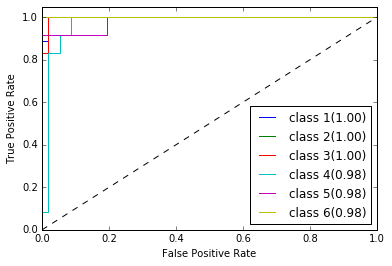

In [36]:
### training
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



y_scores=Multi.predict_proba(X_dataframe_dataset_l_equals_l)
fp_rate=dict()
tp_rate=dict()
R_Auc=dict()
#print(y_scores)


for i in np.arange(1,7,1):
    fp_rate[i], tp_rate[i], _= roc_curve(Y_dataframe_dataset_l_equals_l.values, y_scores[:, i-1],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    
plt.figure()
plt.plot(fp_rate[1],tp_rate[1],label='class 1(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 2(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 3(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 4(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 5(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 6(%0.2f)'%R_Auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#ROC_plot

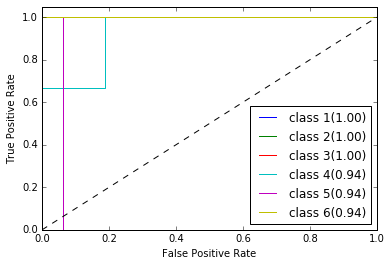

In [37]:
#### test
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



y_scores=Multi.predict_proba(x_dataframe_dataset_l_equals_l)
fp_rate=dict()
tp_rate=dict()
R_Auc=dict()
#print(y_scores)

for i in np.arange(1,7,1):
    fp_rate[i], tp_rate[i], _= roc_curve(y_dataframe_dataset_l_equals_l, y_scores[:, i-1],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    
plt.figure()
plt.plot(fp_rate[1],tp_rate[1],label='class 1(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 2(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 3(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 4(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 5(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 6(%0.2f)'%R_Auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#ROC_plot

## iii. Which method is better for multi-class classification in this problem?

In [38]:
print("the score of L1- penalized multinomial regression model is:",score_using_mul)
print("the score of Gaussian model is:",score_usingGauss)
print("the score of and Multinomial priors model is:",score_usingMulti)



the score of L1- penalized multinomial regression model is: 1.0
the score of Gaussian model is: 1.0
the score of and Multinomial priors model is: 0.9565217391304348


### It is obviously that the L1- penalized multinomial regression model is better for multi-class classification in this problem.

# 2. ISLR 3.7.4

### (a) I would expect the polynomial regression to have a lower training RSS than the linear regression because it could make a tighter fit against data that matched with a wider irreducible error (Var(epsilon)).

### (b) Converse to (a), I would expect the polynomial regression to have a higher test RSS as the overfit from training would have more error than the linear regression.

### (c) Polynomial regression has lower train RSS than the linear fit because of higher flexibility: no matter what the underlying true relationshop is the more flexible model will closer follow points and reduce train RSS. An example of this beahvior is shown on Figure~2.9 from Chapter 2.

### (d) There is not enough information to tell which test RSS would be lowerfor either regression given the problem statement is defined as not knowing "how far it is from linear". If it is closer to linear than cubic, the linear regression test RSS could be lower than the cubic regression test RSS. Or, if it is closer to cubic than linear, the cubic regression test RSS could be lower than the linear regression test RSS. It is dues to bias-variance tradeoff: it is not clear what level of flexibility will fit data better.

# 3. ISLR 4.7.3

In [39]:
### shown in the scan file

# 4. ISLR 4.7.7

In [40]:
### shown in the scan file